# Telecom Churn Prediction

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

Your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

#Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Librraries
import sklearn
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.decomposition import IncrementalPCA
from imblearn.metrics import specificity_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading the data set
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
df_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
df_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [6]:
df_train.shape

(69999, 172)

In [7]:
df_train.nunique()

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

In [8]:
#Removing those columns which has one value throughout from our df_train to increase the accuracy of analysis
df_train = df_train.loc[:,(df_train.nunique() != 1)]

In [201]:
#listing only the columns which has missing value < 30% to make sure that the data analysis accuracy will not be affected
df1 = 100*(df_train.isnull().mean())
cols_with_more_than_30_perc_null = df1[df1 > 30.000000]

In [10]:
cols_with_more_than_30_perc_null

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_6            74.902499
night_pck_user_7            74.478207
night_pck_us

In [11]:
df_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    offnet_mou_6              float64
 8    offnet_mou_7              float64
 9    offnet_mou_8              float64
 10   roam_ic_mou_6             float64
 11   roam_ic_mou_7             float64
 12   roam_ic_mou_8             float64
 13   roam_og_mou_6             float64
 14   roam_og_mou_7             float64
 15   roam_og_mou_8             float64
 16   loc_og_t2t_mou_6          float64
 17   loc_og_t2t_mou_7          float64
 18   loc_og_t2t_mou_8          float64
 19   loc_og_t2m_mou_6          float64
 20   loc_

In [12]:
#Dropping all non-meaninful columns as they wont yield us useful information for analysis
df_train = df_train.drop(columns= ['id'], axis = 1)

In [13]:
df_train.shape

(69999, 158)

#### Seggregating numerical, categorical and date columns

In [200]:
#Considering below features as categorical because night_pck_user_% and fb_user_% are having only 0 and 1 which tells that whether user is night pack/fb user or not 
cat_cols = ['night_pck_user_6' ,'night_pck_user_7','night_pck_user_8',            
            'fb_user_6','fb_user_7','fb_user_8']

date_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

# Below all are related to recharge fields
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

num_cols  = [column for column in df_train.columns if column not in date_cols + cat_cols+recharge_cols]

In [15]:
len(num_cols)

131

In [16]:
df_train.shape

(69999, 158)

## Imputations

### Categorical columns imputations

In [17]:
df_train[cat_cols].nunique()

night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
dtype: int64

##### As per the data distribution, coloumns related to night_pck_user, and fb_user are categorical columns, as they indicate where user using those services are not. So for such categorical columns imputing the values with '-1' (which can be  treated as different category).

In [18]:
# replace missing values with '-1' in categorical columns
df_train[cat_cols] = df_train[cat_cols].apply(lambda x: x.fillna(-1))

### Numerical columns imputations

In [19]:
recharge_cols

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [20]:
df_train[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','av_rech_amt_data_6','count_rech_2g_6','count_rech_3g_6']].head(5)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6,count_rech_2g_6,count_rech_3g_6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,6/25/2014,7.0,25.0,175.0,7.0,0.0


#### It is also observed that  recharge date , total recharge value, max recharge ,avg recharge ,count 2g and count 3g are missing together which means that the customer didn't recharge. So imputing these values with zeros.

In [21]:
# replace missing values with '0' in recharge columns
df_train[recharge_cols] = df_train[recharge_cols].apply(lambda x: x.fillna(0))

In [22]:
df_train[num_cols].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.84576

In [23]:
#imputing with meadian for num_cols as there are outlier. It is good to impute with median than mean
df_train[num_cols] = df_train[num_cols].apply(lambda x: x.fillna(x.median()))

In [24]:
df_train.isnull().sum()*100/df_train.shape[0]

arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_og_mou_6                0.000000
roam_og_mou_7                0.000000
roam_og_mou_8                0.000000
loc_og_t2t_mou_6             0.000000
loc_og_t2t_mou_7             0.000000
loc_og_t2t_mou_8             0.000000
loc_og_t2m_mou_6             0.000000
loc_og_t2m_mou_7             0.000000
loc_og_t2m_mou_8             0.000000
loc_og_t2f_mou_6             0.000000
loc_og_t2f_mou_7             0.000000
loc_og_t2f_mou_8             0.000000
loc_og_t2c_mou_6             0.000000
loc_og_t2c_mou_7             0.000000
loc_og_t2c_m

 All nulls are imputed with appropriate values and no missing values are found after imputation

In [25]:
df_train.shape

(69999, 158)

In [26]:
#Dropping all non-meaninful columns as they wont yield us useful information for analysis 
#we already have AON (age on network) feature and some of date features are having single value for eg last_date_of_month_&
df_train = df_train.drop(date_cols , axis = 1)

In [27]:
df_train.shape

(69999, 152)

## Feature Engineering

#### Filtering good phase members or high-value customers

In [28]:
#Calclulating the average recharge for calls
df_train['av_rech_amt_6_7_8'] = (df_train['total_rech_amt_6'] + df_train['total_rech_amt_7'] + df_train['total_rech_amt_8'])/3

In [30]:
#Calclulating the average recharge for data
# Take the number of recharges, and the average
df_train['av_rech_data_amt_6_7_8'] = ((df_train['av_rech_amt_data_6']*df_train['av_rech_amt_data_6']) + (df_train['av_rech_amt_data_7']*df_train['av_rech_amt_data_7']) + (df_train['av_rech_amt_data_8']*df_train['av_rech_amt_data_8']))/3

In [31]:
#Overall average is average of above 2
df_train['final_av_rech_amt_6_7_8'] = (df_train['av_rech_amt_6_7_8'] + df_train['av_rech_data_amt_6_7_8'])/2

In [32]:
#Calculate  75 percentile of final average recharge amount
avg_df = df_train['final_av_rech_amt_6_7_8'].quantile(0.75)
avg_df

3866.333333333333

In [33]:
#Find the high value customer data 
df_train_filtered = df_train[df_train['final_av_rech_amt_6_7_8'] >= avg_df]
df_train_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,av_rech_amt_6_7_8,av_rech_data_amt_6_7_8,final_av_rech_amt_6_7_8
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.110,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.0,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,21.54,9.36,28.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,10,8,290,136,122,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0,182.666667,29090.000000,14636.333333
7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,11.36,6.04,28.44,13.41,9.16,8.73,0.00,0.00,4.14,24.78,15.21,41.33,0.0,0.0,0.0,0.00,0.00,0.0,0.33,0.68,2.49,0.33,0.68,2.49,25.11,15.89,43.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,2,198,198,198,198,198,198,198,198,0,1.0,1.0,1.0,198.0,198.0,198.0,1.0,1.0,1.0,0.0,0.0,0.0,198.0,198.0,198.0,167.53,6.29,5.40,177.90,151.58,271.40,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,584,82.26,73.56,177.14,0,198.000000,39204.000000,19701.000000
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.790,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.0,0.00,0.1,0.0,0.0

In [34]:
#Check the current size, after filtering high value customers
df_train_filtered.shape

(17500, 155)

In [35]:
# Additional variables created for high value customer detection are not needed,
# as data is  already filtered out. So dropping the same
df_train_filtered = df_train_filtered.drop(['av_rech_amt_6_7_8','av_rech_data_amt_6_7_8','final_av_rech_amt_6_7_8'], axis=1)
df_train_filtered.shape

(17500, 152)

In [38]:
df_train_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4 to 69998
Data columns (total 152 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   loc_o

In [39]:
# change columns types
df_train_filtered[cat_cols] = df_train_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [41]:
# Based on 'aon' (Age On Network) feature, calcuate the age in years
# creating a new variable 'tenure_in_years'
df_train_filtered['tenure_in_years'] = (df_train_filtered['aon']/365).round(0)

# Reduction in Recharge Amount (Deduct the average recharge amount of 1st 2 months from last month)
df_train_filtered['rech_amt_diff'] =  df_train_filtered['total_rech_amt_8'] - ((df_train_filtered['total_rech_amt_6'] + df_train_filtered['total_rech_amt_7'])/2)
df_train_filtered['reduction_rech_amt'] = np.where((df_train_filtered['rech_amt_diff'] < 0), 1, 0) 

#Reduction in number of recharges (Deduct thedf_train_filtered['diff_rech_amt'] =  df_train_filtered['total_rech_amt_8'] - ((df_train_filtered['total_rech_amt_6'] + df_train_filtered['total_rech_amt_7'])/2)
df_train_filtered['rech_num_diff'] =  df_train_filtered['total_rech_num_8'] - ((df_train_filtered['total_rech_num_6'] + df_train_filtered['total_rech_num_7'])/2)
df_train_filtered['reduction_rech_num'] = np.where((df_train_filtered['rech_num_diff'] < 0), 1, 0) 

# Reduction in ARPU (Deduct the average recharge aamount of 1st 2 months from last month)
df_train_filtered['arpu_diff'] = df_train_filtered['arpu_8'] - ((df_train_filtered['arpu_6'] + df_train_filtered['arpu_7'])/2)
df_train_filtered['reduction_arpu'] = np.where((df_train_filtered['arpu_diff'] < 0), 1, 0) 

# Difference in MOU (Cumulative of OG, IC MOU)
df_train_filtered['og_mou_diff'] =  df_train_filtered['total_og_mou_8'] - ((df_train_filtered['total_og_mou_6'] + df_train_filtered['total_og_mou_7'])/2)
df_train_filtered['reduction_og_mou'] = np.where((df_train_filtered['og_mou_diff'] < 0), 1, 0)

df_train_filtered['ic_mou_diff'] =  df_train_filtered['total_ic_mou_8'] - ((df_train_filtered['total_ic_mou_6'] + df_train_filtered['total_ic_mou_7'])/2)
df_train_filtered['reduction_ic_mou'] = np.where((df_train_filtered['ic_mou_diff'] < 0), 1, 0) 

In [42]:
df_train_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,tenure_in_years,rech_amt_diff,reduction_rech_amt,rech_num_diff,reduction_rech_num,arpu_diff,reduction_arpu,og_mou_diff,reduction_og_mou,ic_mou_diff,reduction_ic_mou
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.110,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.0,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.0,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,21.54,9.36,28.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,10,8,290,136,122,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0,2.0,-91.0,1,-3.5,1,-82.8845,1,-37.340,1,12.860,0
7,167.861,167.869,167.866,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,11.36,6.04,28.44,13.41,9.16,8.73,0.00,0.00,4.14,24.78,15.21,41.33,0.0,0.0,0.0,0.00,0.00,0.0,0.33,0.68,2.49,0.33,0.68,2.49,25.11,15.89,43.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,2,198,198,198,198,198,198,198,198,0,1.0,1.0,1.0,198.0,198.0,198.0,1.0,1.0,1.0,0.0,0.0,0.0,198.0,198.0,198.0,167.53,6.29,5.40,177.90,151.58,271.40,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,584,82.26,73.56,177.14,0,2.0,0.0,0,-0.5,1,0.0010,0,0.000,0,23.330,0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.790,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00

In [43]:
# As all the objects are numerical (float64 / int64) types. List only the numeric columns
# Looking at quantiles from 0.90 to 1. 
# Just to be sure, only the relevant colums  are picked up, following criteria is defined:
categorical_cols = ['night_pck_user_6', 'night_pck_user_7','night_pck_user_8',
                    'fb_user_6', 'fb_user_7','fb_user_8']
target_col = ['churn_probability']
numerical_col = [column for column in df_train_filtered.columns if column not in categorical_cols+target_col]
df_train_filtered_num = df_train_filtered[numerical_col]
df_train_filtered_num.quantile(np.arange(0.9,1.01,0.01)).style.bar()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure_in_years,rech_amt_diff,reduction_rech_amt,rech_num_diff,reduction_rech_num,arpu_diff,reduction_arpu,og_mou_diff,reduction_og_mou,ic_mou_diff,reduction_ic_mou
0.900000,798.560500,808.507700,819.238300,266.190000,272.444000,263.968000,473.170000,484.594000,473.027000,12.180000,3.662000,4.841000,17.662000,5.110000,6.062000,118.802000,117.631000,118.505000,273.373000,271.990000,273.612000,12.710000,12.460000,12.212000,3.540000,4.332000,4.650000,421.916000,423.433000,415.938000,93.113000,99.567000,93.827000,142.836000,159.943000,141.022000,1.030000,0.960000,0.832000,311.817000,353.285000,323.295000,0.000000,0.000000,0.000000,12.832000,14.680000,15.560000,1.030000,0.000000,0.000000,735.533000,765.733000,748.714000,120.886000,119.483000,118.790000,296.033000,294.462000,296.755000,38.481000,39.780000,37.790000,467.272000,468.785000,467.640000,18.831000,19.330000,19.190000,48.420000,50.992000,49.060000,3.960000,4.390000,4.012000,78.342000,81.633000,80.018000,568.601000,577.452000,580.045000,0.200000,0.000000,0.000000,8.562000,10.415000,10.296000,0.710000,0.990000,0.880000,16.000000,17.000000,16.000000,945.100000,964.000000,967.000000,252.000000,252.000000,252.000000,220.000000,200.000000,239.000000,5.000000,6.000000,6.000000,252.000000,252.000000,252.000000,4.000000,5.000000,5.000000,1.000000,2.000000,2.000000,354.000000,396.000000,397.000000,577.805000,567.740000,560.590000,1296.892000,1367.869000,1416.303000,245.547000,244.703000,255.404000,222.543000,221.370000,224.683000,1.000000,1.000000,1.000000,4.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2793.200000,755.631000,749.133000,674.254000,8.000000,339.000000,1.000000,4.500000,1.000000,269.358900,1.000000,177.554000,1.000000,137.587000,1.000000
0.910000,837.449390,844.670730,857.167690,296.739000,302.812700,294.266300,505.371400,517.230500,512.639900,16.534500,6.380000,7.480900,22.944500,

- Check for the Percentage changes from 99th percentile:
  - From above bar plot, data, the amount of change is more after 90% higher after 90, and in particular most of the columns has huge change (>200% or so) from 99th percentile. To avoid outliers, considering the 99th percentile as cutoff. 

In [44]:
#Replace the outliers with 99 percentile values
for col in numerical_col:
  cutoff_value = df_train_filtered[col].quantile(0.99)
  outlier_condition_check = df_train_filtered[col] > cutoff_value
  df_train_filtered.loc[outlier_condition_check, col] = cutoff_value
  df_train_filtered_num.loc[outlier_condition_check, col] = cutoff_value
###

In [45]:
#Re-check if the outliers are taken care of
df_train_filtered_num.quantile(np.arange(0.9,1.01,0.01)).style.bar()

# EDA

### Univariate Analysis 

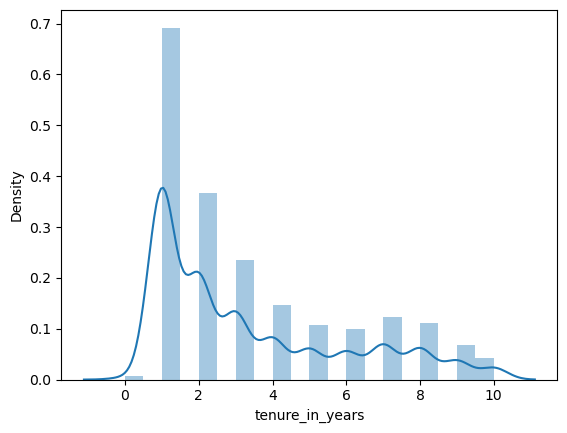

In [46]:
# Checking the impact of tenure_in_years wrto churn_probability
sns.distplot(df_train_filtered['tenure_in_years'],bins=20)
plt.show()

Looks the customer density is more in 0-2 years

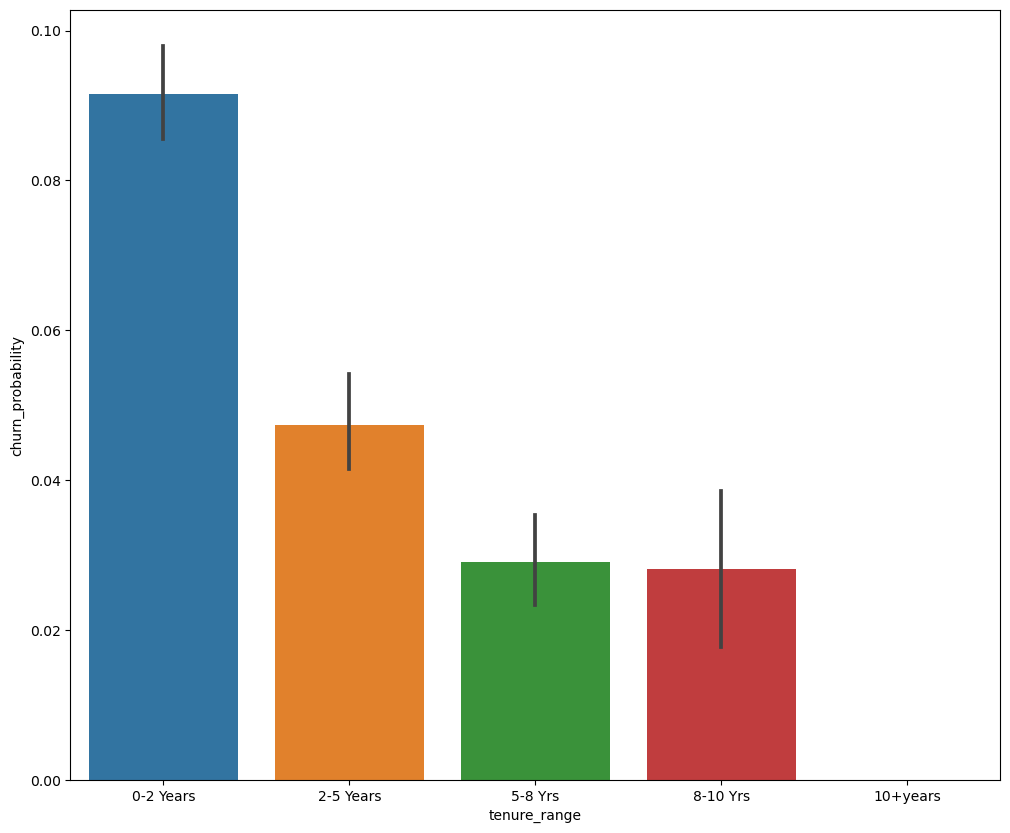

In [47]:
# Plotting a bar plot for tenure of customer in netwrok
tn_range = [0, 2, 5, 8, 10, 11]
tn_label = [ '0-2 Years', '2-5 Years', '5-8 Yrs', '8-10 Yrs', '10+years']
df_train_filtered['tenure_range'] = pd.cut(df_train_filtered['tenure_in_years'], tn_range, labels=tn_label)
plt.figure(figsize=[12,10])
sns.barplot(x='tenure_range',y='churn_probability', data=df_train_filtered)
plt.show()

- From the above plot it is  clear that, there is higher churn for the customers who are for a shorter tenure (<2 years) in network. As the tenure increases, the churn is decreasing.

In [48]:
#checking how arpu_diff is distributed
df_train_filtered['arpu_diff'].describe()

count    17500.000000
mean         3.908456
std        250.619975
min      -2950.506500
25%       -108.282125
50%         -1.688000
75%        116.132750
max        815.786990
Name: arpu_diff, dtype: float64

In [49]:
df_train_filtered[df_train_filtered['arpu_diff']== -2950.506500]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,tenure_in_years,rech_amt_diff,reduction_rech_amt,rech_num_diff,reduction_rech_num,arpu_diff,reduction_arpu,og_mou_diff,reduction_og_mou,ic_mou_diff,reduction_ic_mou,tenure_range
55599,1160.864,1803.86736,856.77,11.51,61.23,6.0,37.41,276.63,5.23,0.0,0.0,0.0,0.0,0.0,0.0,8.16,33.54,6.0,13.86,79.63,0.38,2.18,17.46,0.0,0.0,0.0,0.0,24.21,130.64,6.38,3.35,27.68,0.0,0.0,28.13,0.0,0.46,0.0,0.0,3.81,55.81,0.0,13.0815,13.3322,9.9935,0.0,0.0,0.0,0.0,0.0,0.0,90.24,816.99,26.1,21.31,56.63,1.06,12.98,102.41,0.66,2.79,6.11,0.16,37.09,165.16,1.9,0.0,24.16,0.0,0.0,7.85,0.0,0.0,1.28,0.0,0.0,33.29,0.0,47.58,530.79,1.9,0.0,0.0,0.0,4.6,214.4816,0.0,5.88,2.13,0.0,6,9,1,1686.0,2132.01,0.0,750,790,0.0,550,35,0,1.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,252.0,0.0,0.0,22.65,0.0,0.0,0.04,0.0,0.0,212.17,0.42,0.84,212.17,8.8,9.09,0.0,-1.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,-1.0,-1.0,994,6.61,50.0,0.0,1,3.0,-4960.0,1,-6.5,1,-2950.5065,1,-427.515,1,-287.285,1,2-5 Years


Looks at above sample where arpu_diff is in negative this might be because customer is not generating more revenue as he/she are not using telecom company's services. This sample customer's churn probability is 1.

In [50]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'

def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")

def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(x=var1,y= var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(x=var1, y=var2)
        
#Utility to plot different features
def plot_sns_boxplot(col_name_prefix):
  plt.figure(figsize=(20,15))
  plt.subplot(2,3,1)
  sns.boxplot(data=df_train_filtered, y=col_name_prefix+"_6",x="churn_probability",hue="churn_probability",showfliers=False,)
  plt.subplot(2,3,2)
  sns.boxplot(data=df_train_filtered, y=col_name_prefix+"_7",x="churn_probability",hue="churn_probability",showfliers=False,)
  plt.subplot(2,3,3)
  sns.boxplot(data=df_train_filtered, y=col_name_prefix+"_8",x="churn_probability",hue="churn_probability",showfliers=False,)
  plt.show()


count    17500.000000
mean         3.908456
std        250.619975
min      -2950.506500
25%       -108.282125
50%         -1.688000
75%        116.132750
max        815.786990
Name: arpu_diff, dtype: float64


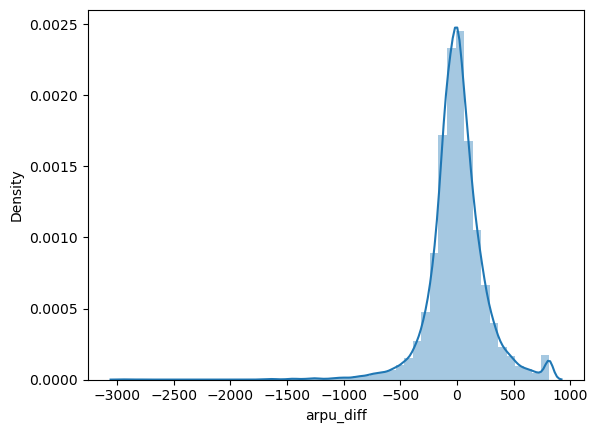

In [51]:
univariate(df_train_filtered.arpu_diff)

count    17500.000000
mean         4.286964
std        318.270757
min      -4960.000000
25%       -135.000000
50%          0.000000
75%        150.000000
max        994.005000
Name: rech_amt_diff, dtype: float64


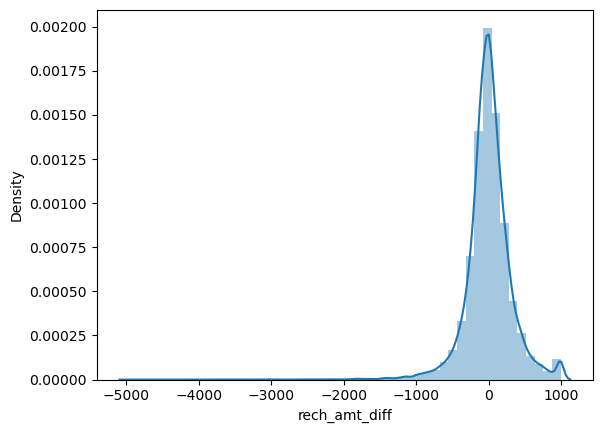

In [52]:
univariate(df_train_filtered.rech_amt_diff)

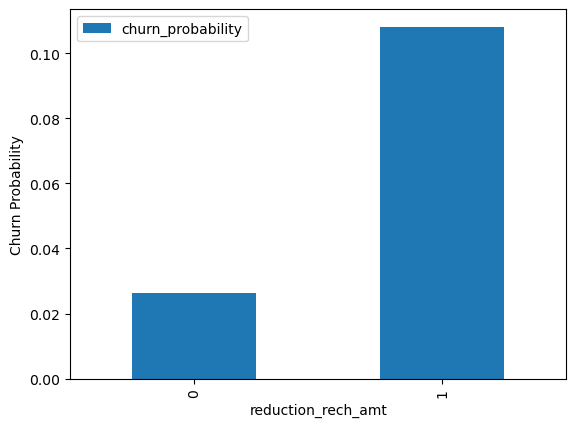

In [53]:
#Plot the reduction in recharge amount
df_train_filtered.pivot_table(values='churn_probability', index='reduction_rech_amt', aggfunc='mean').plot.bar()
plt.ylabel('Churn Probability')
plt.show()


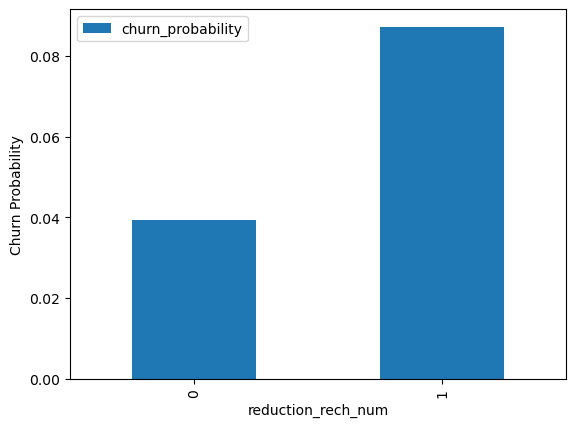

In [54]:
#Plot the reduction in recharge num
df_train_filtered.pivot_table(values='churn_probability', index='reduction_rech_num', aggfunc='mean').plot.bar()
plt.ylabel('Churn Probability')
plt.show()


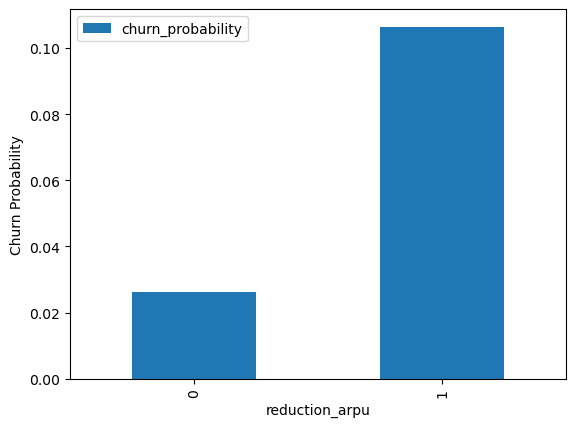

In [55]:
#Plot the reduction in reachrge amount
df_train_filtered.pivot_table(values='churn_probability', index='reduction_arpu', aggfunc='mean').plot.bar()
plt.ylabel('Churn Probability')
plt.show()


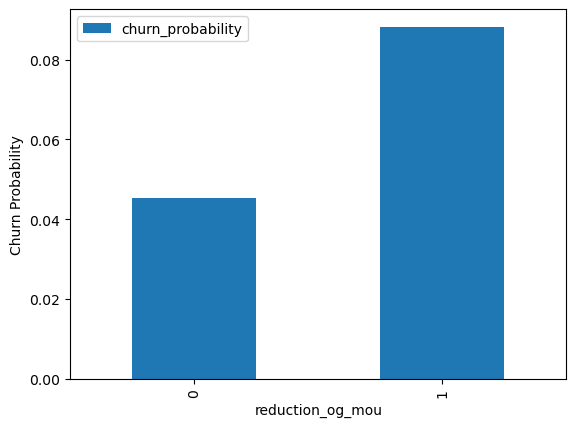

In [56]:
#Plot against reduction in o/g MOU
df_train_filtered.pivot_table(values='churn_probability', index='reduction_og_mou', aggfunc='mean').plot.bar()
plt.ylabel('Churn Probability')
plt.show()

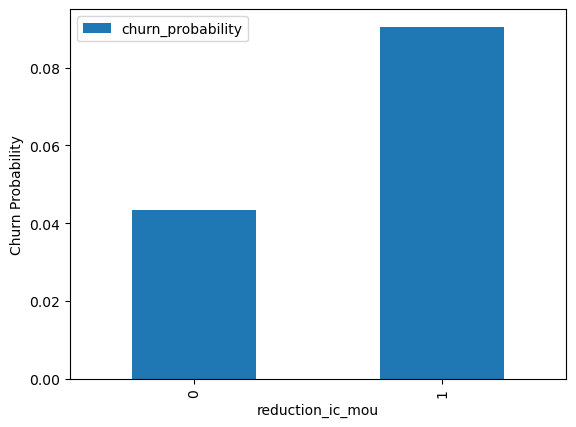

In [57]:
#Plot against reduction in i/c MOU
df_train_filtered.pivot_table(values='churn_probability', index='reduction_ic_mou').plot.bar()
plt.ylabel('Churn Probability')
plt.show()

- From the above plots, difference in ARPU, Recharge Amount, and Minutes of Usage for both Outgoing, incoming calls, it is evident that the reduction of these values are higher for churned users.

- Based on last Month (8, August) data, check the pattern of users where the custoemrs have not used any of the services like calls (both incoming , outgoing), internet in the month of August. So this effectively will lead to minial revenue. If the user has not made any of the services (entry is 0 for those columns as per data), then treat those users as churned.  Checking the same via BoxPlot.

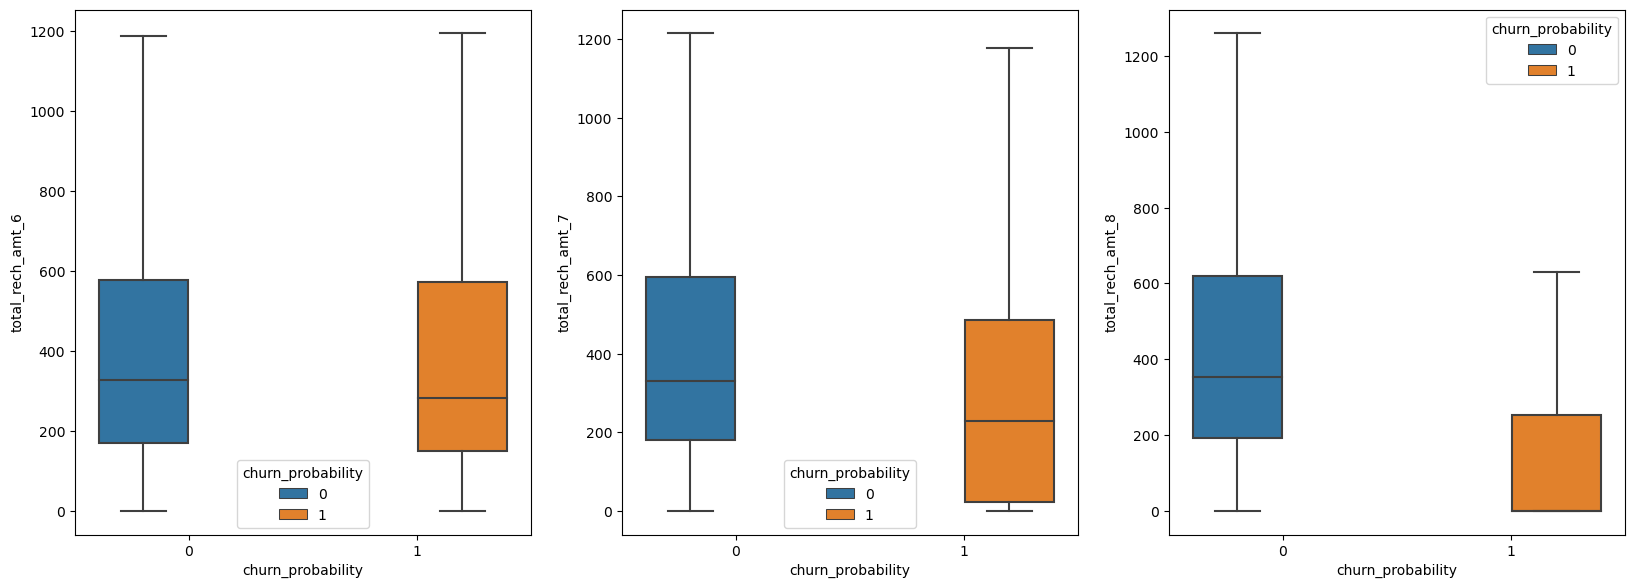

In [58]:
#Draw the box plot to understand the pattern of churn wrto total recharge amount
plot_sns_boxplot("total_rech_amt")

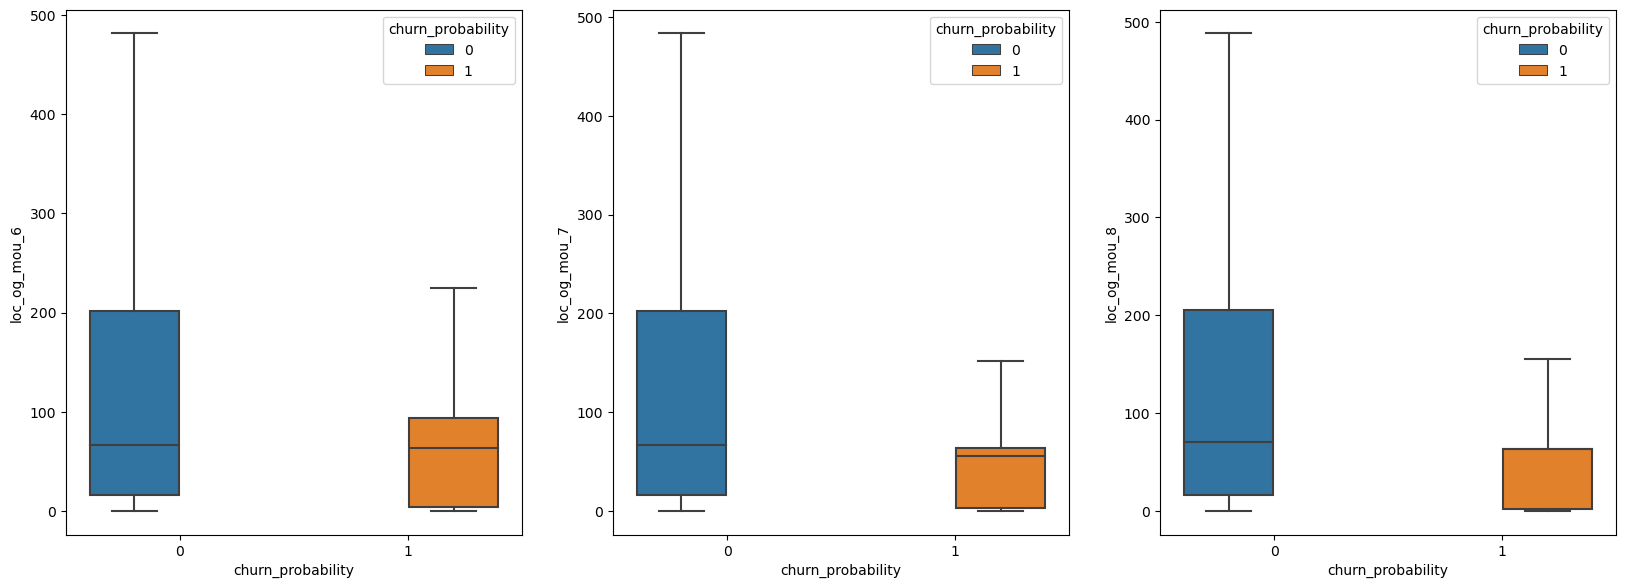

In [59]:
#Draw the box plot to understand the pattern of churn wrto total recharge amount
plot_sns_boxplot("loc_og_mou")

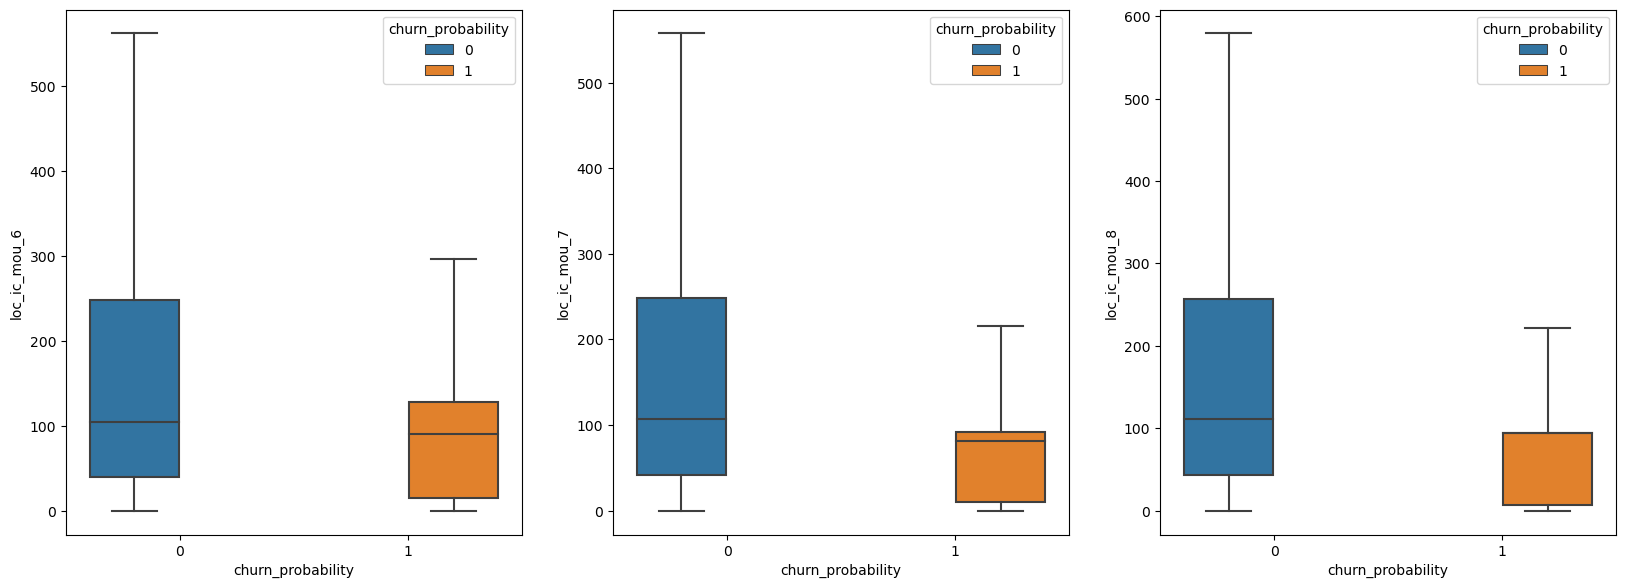

In [60]:
#Draw the box plot to understand the pattern of churn wrto total recharge amount
plot_sns_boxplot("loc_ic_mou")

- As per the Boxplot, there is a huge drop in maximum recharge amount, outgoing, incoming calls, for data in the 8th month (August) for churned customers as compared to other months. 

# Bivariate Analysis

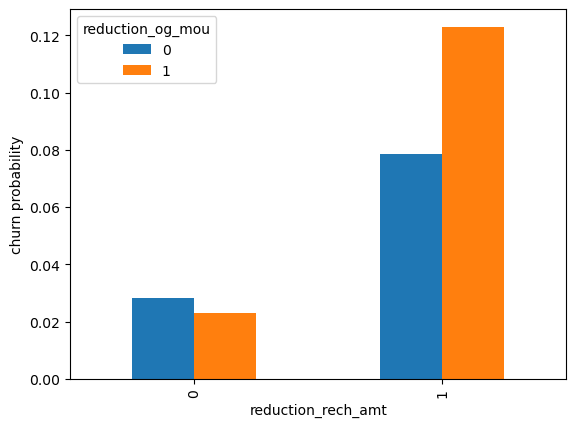

In [61]:
#Checking the relation of o/g mou, recharge amount, with churn
df_train_filtered.pivot_table(values='churn_probability', index='reduction_rech_amt', columns='reduction_og_mou', aggfunc='mean').plot.bar()
plt.ylabel('churn probability')
plt.show()

- In the above case, the churn probability is higher for the customers for whom there is reduction in recharge amount, and reduction in outgoing calls.

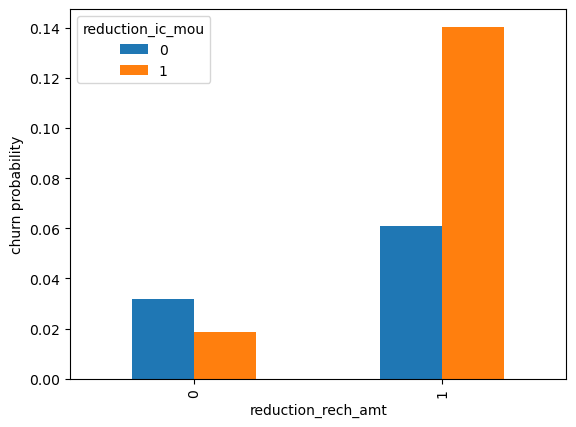

In [62]:
#Checking the relation of i/c mou, recharge amount, with churn
df_train_filtered.pivot_table(values='churn_probability', index='reduction_rech_amt', columns='reduction_ic_mou', aggfunc='mean').plot.bar()
plt.ylabel('churn probability')
plt.show()

- In the above case, the churn probability is higher for the customers for whom there is reduction in recharge amount, and reduction in outgoing calls.

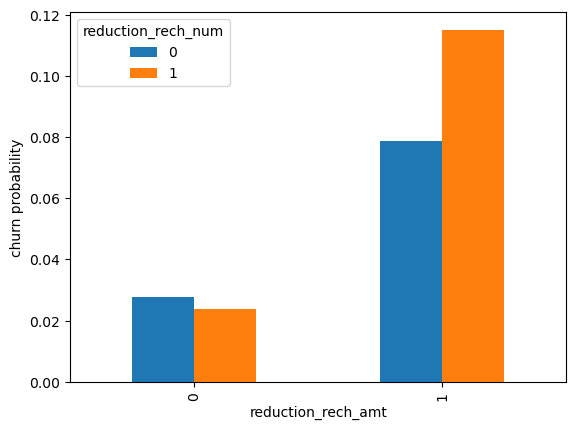

In [63]:
#Checking the relation of no of recharges, recharge amount, with churn
df_train_filtered.pivot_table(values='churn_probability', index='reduction_rech_amt', columns='reduction_rech_num', aggfunc='mean').plot.bar()
plt.ylabel('churn probability')
plt.show()

- In the above case, the churn probability is higher for the customers for whom there is reduction in recharge amount, and reduction in number of recharges.

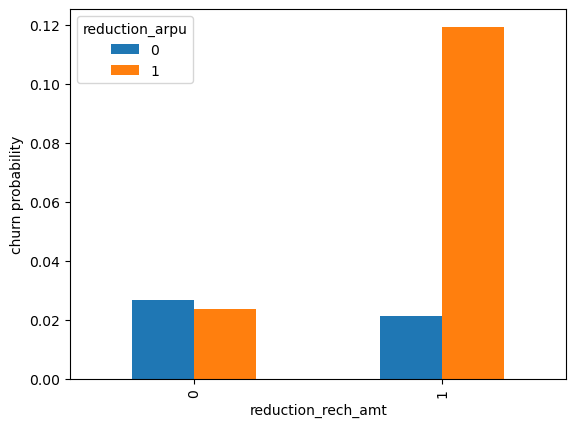

In [64]:
#Checking the relation of i/c mou, recharge amount, with churn
df_train_filtered.pivot_table(values='churn_probability', index='reduction_rech_amt', columns='reduction_arpu', aggfunc='mean').plot.bar()
plt.ylabel('churn probability')
plt.show()

- In the above case, the churn probability is higher for the customers for whom there is reduction in recharge amount, and reduction in ARPU (Average Revenue Per User).

In [65]:
# Drop newly added columns as these columns are to get some insights on the data.
df_train_filtered = df_train_filtered.drop(['tenure_range','tenure_in_years','rech_amt_diff','reduction_rech_amt',
                                                                'rech_num_diff','reduction_rech_num','arpu_diff','reduction_arpu',
                                                                'og_mou_diff','reduction_og_mou','ic_mou_diff','reduction_ic_mou'],axis=1)

# Model Selection and Model building

In [66]:
X = df_train_filtered.drop(['churn_probability'],axis=1)
y = df_train_filtered['churn_probability']

In [67]:
X.shape,y.shape

((17500, 151), (17500,))

In [68]:
X.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 4 to 69998
Data columns (total 151 columns):
 #    Column              Dtype   
---   ------              -----   
 0    arpu_6              float64 
 1    arpu_7              float64 
 2    arpu_8              float64 
 3    onnet_mou_6         float64 
 4    onnet_mou_7         float64 
 5    onnet_mou_8         float64 
 6    offnet_mou_6        float64 
 7    offnet_mou_7        float64 
 8    offnet_mou_8        float64 
 9    roam_ic_mou_6       float64 
 10   roam_ic_mou_7       float64 
 11   roam_ic_mou_8       float64 
 12   roam_og_mou_6       float64 
 13   roam_og_mou_7       float64 
 14   roam_og_mou_8       float64 
 15   loc_og_t2t_mou_6    float64 
 16   loc_og_t2t_mou_7    float64 
 17   loc_og_t2t_mou_8    float64 
 18   loc_og_t2m_mou_6    float64 
 19   loc_og_t2m_mou_7    float64 
 20   loc_og_t2m_mou_8    float64 
 21   loc_og_t2f_mou_6    float64 
 22   loc_og_t2f_mou_7    float64 
 23   loc_og_t2f_mou

In [204]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 151), (3500, 151), (14000,), (3500,))

In [70]:
columns_scale = X_train.columns.to_list()

In [71]:
# Feature Scaling
scaler = StandardScaler()
X_train[columns_scale] = scaler.fit_transform(X_train[columns_scale])
X_test[columns_scale]  = scaler.transform(X_test[columns_scale])

In [72]:
# Store the features
features = df_train_filtered.drop('churn_probability', axis=1).columns

In [73]:
#Utilitiy to calculate the accuracy, scores based on provided actual, predicted data
def calculate_metrics(actual_data,pred_data):
  accuracy = accuracy_score(actual_data, pred_data)
  precision = precision_score(actual_data,pred_data)
  recall = recall_score(actual_data,pred_data)
  specificity = specificity_score(actual_data,pred_data)
  return [accuracy,precision,recall,specificity]

In [74]:
def print_metrics(prefix,metrics):
  print(prefix,"- Data Metrics:")
  print("=====================================================")
  print("Accuracy %:",round(100*metrics[0],2))
  print("Precision %:",round(100*metrics[1],2))
  print("Recall / Sensitivity %:",round(100*metrics[2],2))
  print("Specificity %:",round(100*metrics[3],2))
  print("=====================================================")

# Logistic Regression without PCA

In [75]:
# Creating KFold object with 5 splits
num_folds = KFold(n_splits=5, shuffle=True, random_state=42)

params = {"C": [0.01, 0.1, 1, 10, 100]}

# Specifing score as accuracy
# added class_weight parameter  to take care of imbalance
logit_model_cv = GridSearchCV(estimator = LogisticRegression(class_weight="balanced"),
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = num_folds, 
                        verbose = 1) 

# Fit the model
logit_model_cv.fit(X_train, y_train)

# Best score with best C
best_score = logit_model_cv.best_score_
best_c_value = logit_model_cv.best_params_['C']

print(" The highest test accuracy is {0} for C = {1}".format(best_score, best_c_value))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
 The highest test accuracy is 0.8405000000000001 for C = 100


 Re-Modeling with Best C Score

In [76]:
# Re-model with best C value (100)
logit_model_best_c = LogisticRegression(C=best_c_value,class_weight="balanced")

In [77]:
# Fit the model
logit_model = logit_model_best_c.fit(X_train, y_train)

In [78]:
# Predictions on the train data set
y_train_pred = logit_model.predict(X_train)

In [79]:
logit_model.coef_

array([[ 4.24656726e-02,  2.41689809e-01,  1.13845363e+00,
        -4.30634353e-02,  6.88331070e-01,  1.47198631e+00,
         8.64035191e-01,  1.38066515e-01,  1.91848179e-01,
        -6.60986169e-02,  2.55661750e-01, -3.00952068e-02,
         2.70986031e-02, -2.45604653e-01, -3.92610877e-02,
         4.48977884e-01,  2.37510019e-01, -1.33860151e+00,
         9.29531055e-02,  4.90963766e-01, -7.29872502e-01,
         2.90264758e-02, -9.69560097e-02,  6.74159907e-02,
        -1.17302517e-01,  2.61831636e-02,  2.38393415e-01,
        -3.37938916e-01, -3.31898177e-01,  2.87163463e+00,
        -1.36255570e-02, -2.58002527e-01, -1.60896488e+00,
        -9.77031234e-01,  3.91992730e-01, -6.25978248e-01,
        -9.66898987e-02,  8.85888477e-02, -3.54932766e-01,
         7.89771666e-01,  3.37387819e-01,  3.24212825e+00,
         1.13178647e-02, -2.85719824e-03,  1.37150456e-01,
         1.85073147e-02,  3.84741987e-02, -1.70658484e-01,
         5.56979427e-02,  0.00000000e+00,  0.00000000e+0

In [80]:
coefficients = logit_model.coef_[0]

In [81]:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})

In [82]:
feature_importance = feature_importance.sort_values('Importance',ascending=False)

In [83]:
#Top 10 features with Positive correlation
feature_importance.head(10)

,Feature,Importance
41,std_og_mou_8,3.242128
29,loc_og_mou_8,2.871635
65,loc_ic_mou_8,2.231698
5,onnet_mou_8,1.471986
2,arpu_8,1.138454
77,std_ic_mou_8,1.135048
6,offnet_mou_6,0.864035
39,std_og_mou_6,0.789772
4,onnet_mou_7,0.688331
142,sachet_3g_7,0.595246


In [84]:
#Top 10 features with Negative correlation
feature_importance.tail(10)

,Feature,Importance
52,total_og_mou_7,-0.839277
112,count_rech_3g_7,-0.866093
71,std_ic_t2m_mou_8,-0.931799
33,std_og_t2m_mou_6,-0.977031
95,total_rech_amt_8,-0.996086
59,loc_ic_t2m_mou_8,-1.092584
17,loc_og_t2t_mou_8,-1.338602
32,std_og_t2t_mou_8,-1.608965
80,total_ic_mou_8,-2.074851
53,total_og_mou_8,-4.012442


In [85]:
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11006  2028]
 [  161   805]]


In [86]:
#Calculate accuracy, sensitivity, specificity on train data
logit_train_metrics = calculate_metrics(y_train, y_train_pred)

In [87]:
# Accuracy on Training Set
print_metrics("Logistic Regression - Train ",logit_train_metrics)

Logistic Regression - Train  - Data Metrics:
Accuracy %: 84.36
Precision %: 28.42
Recall / Sensitivity %: 83.33
Specificity %: 84.44


In [88]:
# Prediction on the test set
y_test_pred = logit_model.predict(X_test)

In [89]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)



[[2741  553]
 [  29  177]]


In [90]:
#Calculate accuracy, sensitivity, specificity on test data
logit_test_metrics = calculate_metrics(y_test, y_test_pred)

In [91]:
# Accuracy on Test Set
print_metrics("Logistic Regression - Test ",logit_test_metrics)

Logistic Regression - Test  - Data Metrics:
Accuracy %: 83.37
Precision %: 24.25
Recall / Sensitivity %: 85.92
Specificity %: 83.21


#### Summary of Observations with Logistic Regression(no (PCA):
    - Accuracy score is close to 84% for both train, test data.
    - For all the customers who actually churned the model is able to identify ~83 - 85% accurately 
    for train and test(Recall).
    - The precision is relatively low (~28%). So when the model predicted as churn, it was true about 28% of the time.
    - Specificity is around 83% with both train, test data. So the customers who have no churn is identifed ~84% correctly.
    
- Top Features:
    - Features with Positive Correlation:

        - std_og_mou_8
        - loc_og_mou_8
        - loc_ic_mou_8
        - onnet_mou_8
        - arpu_8
        - std_ic_mou_8
        - offnet_mou_6
        - std_og_mou_6
        - onnet_mou_7	
        - sachet_3g_7

    - Features with Negative Correlation:
        - total_og_mou_7	
        - count_rech_3g_7	
        - std_ic_t2m_mou_8	
        - std_og_t2m_mou_6	
        - total_rech_amt_8	
        - loc_ic_t2m_mou_8	
        - loc_og_t2t_mou_8	
        - std_og_t2t_mou_8	
        - total_ic_mou_8	
        - total_og_mou_8	

## 3.2. Logistic Regression with PCA

In [92]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [93]:

# applying PCA on train data
pca.fit(X_train)

PCA(random_state=42)

In [94]:
X_train_pca=pca.fit_transform(X_train)
print("Dimension of X_train_pca: ",X_train_pca.shape)

Dimension of X_train_pca:  (14000, 151)


In [95]:
X_test_pca=pca.transform(X_test)

In [96]:
X_train_pca

array([[ 6.39710450e+00, -4.93168253e+00, -2.64297344e+00, ...,
         8.09493540e-04,  9.59480149e-17, -2.82298121e-16],
       [ 7.85367753e+00, -3.74568163e+00,  5.46640952e+00, ...,
        -6.26085016e-04, -5.79268264e-16,  3.39432898e-16],
       [ 3.41166018e-01, -2.07917117e+00, -3.52966111e+00, ...,
         8.50712778e-04, -1.49234488e-17, -4.79586760e-16],
       ...,
       [ 3.87059677e+00,  6.06790096e+00, -2.33756078e+00, ...,
         2.67482016e-04,  3.95961249e-19,  4.43586748e-17],
       [-3.47894753e+00,  2.77074844e+00, -3.24634487e-01, ...,
        -2.49891571e-03, -5.73491350e-18,  1.79788464e-17],
       [-5.09248972e+00, -1.57856051e+00, -4.41973331e-01, ...,
         1.42407844e-04, -8.96823148e-18, -1.29744810e-17]])

In [97]:
#Viewing the PCA components
pca.components_

array([[ 1.65239102e-01,  1.70173526e-01,  1.62629227e-01, ...,
         5.71569821e-02,  5.99412183e-02,  5.53735619e-02],
       [ 1.85440976e-02,  1.64523157e-02,  1.26416379e-02, ...,
         1.22433123e-01,  1.33274463e-01,  1.31500747e-01],
       [ 4.84919670e-02,  7.12694842e-02,  5.78037796e-02, ...,
         1.36734639e-02,  1.77071837e-02,  1.28997351e-02],
       ...,
       [ 9.93161794e-04, -7.17297659e-04, -2.73534186e-04, ...,
        -3.24585584e-04,  5.67507378e-04,  1.32850658e-04],
       [ 0.00000000e+00,  8.11694265e-18,  1.44748013e-16, ...,
         1.33002313e-16, -6.52545723e-17, -1.40270531e-17],
       [-0.00000000e+00, -1.04743637e-16,  1.77568597e-16, ...,
         2.81527831e-17,  5.89186880e-17, -3.26603576e-17]])

In [98]:
pca.explained_variance_ratio_

array([1.51208887e-01, 8.31155548e-02, 6.84362615e-02, 5.94990137e-02,
       3.80116020e-02, 3.40196686e-02, 2.66182739e-02, 2.55342984e-02,
       2.45724909e-02, 2.24716655e-02, 2.18282235e-02, 1.97168129e-02,
       1.79906741e-02, 1.74140963e-02, 1.56152458e-02, 1.47665390e-02,
       1.42099486e-02, 1.35259640e-02, 1.29403892e-02, 1.25071791e-02,
       1.04442100e-02, 1.00857228e-02, 9.95190336e-03, 8.97951001e-03,
       8.86636903e-03, 8.37480076e-03, 8.03425694e-03, 7.90770398e-03,
       7.88430844e-03, 7.58963718e-03, 7.54899815e-03, 7.17312880e-03,
       7.05007720e-03, 6.90422379e-03, 6.29418389e-03, 5.90661012e-03,
       5.77659751e-03, 5.71587289e-03, 5.47465631e-03, 5.38920723e-03,
       5.25620516e-03, 5.13916577e-03, 4.92065587e-03, 4.56288929e-03,
       4.46790495e-03, 4.33969784e-03, 4.28099180e-03, 4.25752191e-03,
       4.06735791e-03, 3.81914300e-03, 3.70354088e-03, 3.57038107e-03,
       3.53382191e-03, 3.44660945e-03, 3.35968420e-03, 3.23687219e-03,
      

- ScreePlot to check the number of PC's which can explain most of the variance

In [99]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

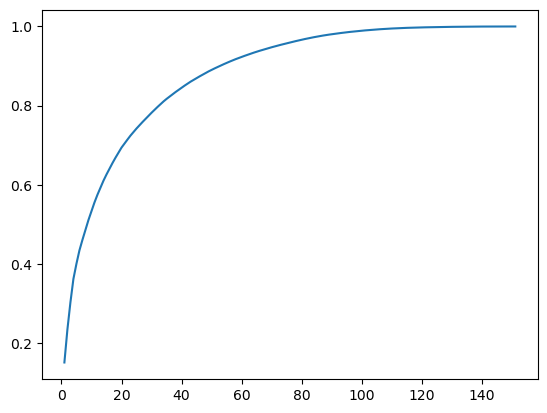

In [100]:
#ScreePlot
plt.plot(range(1,len(var_cum)+1), var_cum)

- From the above plot, 60+ features explains >90% of variance,and around 80+ features explains ~95% variance.

In [101]:
# Instantiate PCA with 80 components which expains ~95% of variance
incr_pca = IncrementalPCA(n_components=80)

In [102]:
X_train_pca = incr_pca.fit_transform(X_train)
X_test_pca = incr_pca.transform(X_test)

In [103]:
# Creating KFold object with 5 splits
num_folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [104]:
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as accuracy
# added class_weight parameter  to take care of imbalance
logit_pca_model_cv = GridSearchCV(estimator = LogisticRegression(class_weight="balanced"),
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = num_folds, 
                        verbose = 1) 

In [105]:
logit_pca_model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)

In [106]:
best_score = logit_pca_model_cv.best_score_
best_c_score = logit_pca_model_cv.best_params_['C']
best_score

0.8109285714285714

In [107]:
best_c_score

0.1

In [108]:
#TBD
logit_pca_best_cv = LogisticRegression(C=best_c_score,class_weight="balanced")

In [109]:
# Fit the model
logit_pca_model = logit_pca_best_cv.fit(X_train_pca, y_train)

In [110]:
#predict
y_train_pred = logit_pca_model.predict(X_train_pca)

In [111]:
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[10582  2452]
 [  166   800]]


In [112]:
#Calculate accuracy, sensitivity, specificity on test data
logit_pca_train_metrics = calculate_metrics(y_train, y_train_pred)

In [113]:
# Accuracy on Train Set
print_metrics("Logistic Regression With PCA - Train ",logit_pca_train_metrics)

Logistic Regression With PCA - Train  - Data Metrics:
Accuracy %: 81.3
Precision %: 24.6
Recall / Sensitivity %: 82.82
Specificity %: 81.19


In [114]:
# Prediction on the test set
y_test_pred = logit_pca_model.predict(X_test_pca)

In [115]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)


[[2652  642]
 [  35  171]]


In [116]:
#Calculate accuracy, sensitivity, specificity on test data
logit_pca_test_metrics = calculate_metrics(y_test, y_test_pred)


In [117]:
# Accuracy on Test Set
print_metrics("Logistic Regression With PCA - Test ",logit_pca_test_metrics)

Logistic Regression With PCA - Test  - Data Metrics:
Accuracy %: 80.66
Precision %: 21.03
Recall / Sensitivity %: 83.01
Specificity %: 80.51


#### Summary of Logistic Regression with PCA:
    - Accuracy score is close to 81% for both train, test data.
    - The recall of the model is around 83%. So for all the customers who actually churned the model is able to identify ~83% accurately. 
    - The precision is relatively low (~24%). So when the model predicted as churn, it was true about only 24% of the time.
    - Specificity is around 81% on train and test data.  So the customers who have no churn is identifed ~81% correctly.

##  DecisionTree with hyperparameter tuning

In [118]:
params = {
    "max_depth":[2,3,5,10,20],
    "min_samples_leaf":[5,10,20,50,100],
    "min_samples_split":[5,10,20,50],
    "criterion":['gini','entropy']
}

#DecisionTree Classifier with class weight
# In this case weight is chosen as 20% for non-churn and 80% for churn to address imbalance problems.
dt = DecisionTreeClassifier(random_state=42,class_weight={0:0.2, 1: 0.8})

#As the data is balanced use "accuracy" as measure
grid_search_dt = GridSearchCV(estimator=dt,
             param_grid=params,
             cv=4,n_jobs=-1,verbose=1,
             scoring="accuracy")

In [119]:
%%time
grid_search_dt.fit(X_train,y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
CPU times: total: 1min 29s
Wall time: 9min 23s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8},
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [120]:
cv_df = pd.DataFrame(grid_search_dt.cv_results_)

In [121]:
dt_best = grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, min_samples_leaf=100, min_samples_split=5,
                       random_state=42)

In [122]:
y_train_pred = dt_best.predict(X_train)

In [123]:
confusion = confusion_matrix(y_train,y_train_pred)
confusion

array([[12284,   750],
       [  279,   687]], dtype=int64)

In [124]:
#Calculate accuracy, sensitivity, specificity on train data
dt_train_metrics = calculate_metrics(y_train, y_train_pred)

In [125]:
# Accuracy on Train Set
print_metrics("Decision Train - Test ",dt_train_metrics)

Decision Train - Test  - Data Metrics:
Accuracy %: 92.65
Precision %: 47.81
Recall / Sensitivity %: 71.12
Specificity %: 94.25


In [126]:
y_test_pred = dt_best.predict(X_test)

In [127]:
#Calculate accuracy, sensitivity, specificity on test data
dt_test_metrics = calculate_metrics(y_test, y_test_pred)

In [128]:
# Accuracy on Test Set
print_metrics("Decision Tree - Test ",dt_test_metrics)

Decision Tree - Test  - Data Metrics:
Accuracy %: 93.14
Precision %: 44.88
Recall / Sensitivity %: 72.33
Specificity %: 94.44


- Accuracy is ~93% in both train, test set using a DecisionTreeClassifier. and the Recall value are around ~72% on test and 71% on train  using decision trees.

In [129]:
dt_best.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00371568, 0.        , 0.        , 0.        , 0.0301177 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0045243 ,
       0.        , 0.        , 0.        , 0.        , 0.01204424,
       0.05391741, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [130]:
dt_best_imp = pd.DataFrame({"VariableName":features,"Importance":dt_best.feature_importances_})
dt_best_imp.sort_values(by="Importance",ascending=False)

,VariableName,Importance
80,total_ic_mou_8,0.646097
116,av_rech_amt_data_8,0.106726
146,fb_user_8,0.056761
65,loc_ic_mou_8,0.053917
14,roam_og_mou_8,0.030118
79,total_ic_mou_7,0.023591
78,total_ic_mou_6,0.020818
64,loc_ic_mou_7,0.012044
101,last_day_rch_amt_8,0.010233
126,arpu_2g_6,0.007273


#### Summary of Decision Tree Model:
    - Accuracy score is improved compared to Logistic Regression Models. It is close to 93% in both test, train data. 
    - The recall of the model is ~73% on train and test. So for all the customers who actually churned the model is able to identify  ~73% accurately. 
    - Specificity is around 94% on train and test data.  So the customers who have not churn are identifed ~94% correctly.
    
    -Important features from DecisionTree Model: 
        - total_ic_mou_8	
        - av_rech_amt_data_8
        - fb_user_8	
        - loc_ic_mou_8	
        - roam_og_mou_8	
        - total_ic_mou_7	
        - total_ic_mou_6	
        - loc_ic_mou_7	
        - last_day_rch_amt_8	
        - arpu_2g_6	

##  RandomForest with hyperparameter Tuning

In [132]:
#Initiate RF with class weight,
# in this case weight is chosen as 20% for no churn, and 80% for churn case
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,class_weight={0:0.2, 1: 0.8},oob_score=True)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4,5],
    'n_estimators': [10, 30, 50, 100, 200]
}

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=classifier_rf, param_grid=params,
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [133]:
%%time
grid_search_rf.fit(X_train,y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits
CPU times: total: 4min 56s
Wall time: 12min 26s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [138]:
grid_search_rf.best_score_

0.9505714285714286

In [135]:
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_features=2, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42)

In [136]:
y_train_pred = rf_best.predict(X_train)

In [137]:
confusion = confusion_matrix(y_train,y_train_pred)
confusion

array([[12871,   163],
       [  507,   459]], dtype=int64)

In [139]:
#Calculate accuracy, sensitivity, specificity on train data
rf_train_metrics = calculate_metrics(y_train, y_train_pred)


In [140]:
# Accuracy on Train Set
print_metrics("RandomForest - Train ",rf_train_metrics)


RandomForest - Train  - Data Metrics:
Accuracy %: 95.21
Precision %: 73.79
Recall / Sensitivity %: 47.52
Specificity %: 98.75


In [141]:
y_test_pred = rf_best.predict(X_test)

In [142]:
#Calculate accuracy, sensitivity, specificity on test data
rf_test_metrics = calculate_metrics(y_test, y_test_pred)

In [143]:
# Accuracy on Test Set
print_metrics("RandomForest - Test ",rf_test_metrics)

RandomForest - Test  - Data Metrics:
Accuracy %: 95.97
Precision %: 73.05
Recall / Sensitivity %: 50.0
Specificity %: 98.85


In [144]:
# OOB Score
rf_best.oob_score_

0.9507857142857142

In [145]:
#Important Features
rf_best.feature_importances_

array([0.00342459, 0.00520505, 0.02861343, 0.00335969, 0.00405813,
       0.01278292, 0.00347516, 0.00390024, 0.01846186, 0.00097008,
       0.00220603, 0.00432243, 0.0004059 , 0.00215858, 0.00380509,
       0.00365209, 0.00591836, 0.01866378, 0.00277811, 0.00489582,
       0.02051353, 0.00105007, 0.00305944, 0.01152127, 0.0001686 ,
       0.0007266 , 0.00305824, 0.00366148, 0.00806746, 0.01966992,
       0.00123544, 0.00120023, 0.00353235, 0.00276748, 0.00225676,
       0.00982607, 0.00031425, 0.00043514, 0.00112835, 0.00299919,
       0.00305225, 0.00678728, 0.00032773, 0.00057606, 0.00056864,
       0.00075783, 0.00126319, 0.01419159, 0.00032423, 0.        ,
       0.        , 0.00639658, 0.00986468, 0.02361251, 0.0048872 ,
       0.00525254, 0.01920682, 0.0019618 , 0.0094124 , 0.01831602,
       0.00359952, 0.00923327, 0.02733724, 0.00572532, 0.00820494,
       0.02155585, 0.00097485, 0.00122204, 0.00882786, 0.00240845,
       0.00219251, 0.00941716, 0.00118123, 0.00221189, 0.00993

In [146]:
#Important features of RF
rf_best_imp = pd.DataFrame({
    "VariableName": features,
    "Importance": rf_best.feature_importances_
})

In [147]:
rf_best_imp = rf_best_imp.sort_values(by="Importance", ascending=False).head(10)
rf_best_imp.head(10)

,VariableName,Importance
80,total_ic_mou_8,0.057737
119,vol_2g_mb_8,0.045213
95,total_rech_amt_8,0.033163
131,night_pck_user_8,0.030599
2,arpu_8,0.028613
62,loc_ic_t2f_mou_8,0.027337
146,fb_user_8,0.024953
104,total_rech_data_8,0.023682
53,total_og_mou_8,0.023613
65,loc_ic_mou_8,0.021556


#### Summary of Random Forest Model:
    - Accuracy score is improved compared to Logistic Regression Models. It is close to 95% in both test, train data. 
    - The recall of the model is reduced in case of RF. With train set it looks the recall is around 47%, but with test set it is ~50% . So for all the customers who actually churned the model is able to identify only ~50% accurately. 
    - The precision with decision tree model is improved to ~74% with train data set, and 73% with test data.So when the model predicted as churn, it was true about 70-74% of the times.
    - Specificity is around ~95% on train and test data.  So the customers who have no churn is identifed ~95% correctly.
    - OOB Score is close to 95%, which indicates % of correctly predicted samples.
    
    -Important features from RandomForest Model: 
        Top 10 features of the RF model. Most of the features are related to to August Month. 
        - `total_ic_mou_8`
        - `vol_2g_mb_8`
        - `total_rech_amt_8`
        - `night_pck_user_8`
        - `arpu_8`
        - 'loc_ic_t2f_mou_8'
        - 'fb_user_8'
        - 'total_rech_data_8'
        - 'total_og_mou_8'
		- 'loc_ic_mou_8'

In [148]:
### Summarizing the performance of all models:


stat_summary = pd.DataFrame(index=["Accuracy-Train","Precision-Train","Recall-Train","specificity-Train",
                                   "Accuracy-Test","Precision-Test","Recall-Test","specificity-Test"],
                       columns = ['LogisticRegression', 'LogisticRegressionWithPCA', 'DecisionTree','RandomForest'])
stat_summary['LogisticRegression'] = [logit_train_metrics[0],logit_train_metrics[1],logit_train_metrics[2],logit_train_metrics[3],
                                      logit_test_metrics[0],logit_test_metrics[1],logit_test_metrics[2],logit_test_metrics[3]]
stat_summary['LogisticRegressionWithPCA'] = [logit_pca_train_metrics[0],logit_pca_train_metrics[1],logit_pca_train_metrics[2],logit_pca_train_metrics[3],
                                             logit_pca_test_metrics[0],logit_pca_test_metrics[1],logit_pca_test_metrics[2],logit_pca_test_metrics[3]]
stat_summary['DecisionTree'] = [dt_train_metrics[0],dt_train_metrics[1],dt_train_metrics[2],dt_train_metrics[3],
                                dt_test_metrics[0],dt_test_metrics[1],dt_test_metrics[2],dt_test_metrics[3]]
stat_summary['RandomForest'] = [rf_train_metrics[0],rf_train_metrics[1],rf_train_metrics[2],rf_train_metrics[3],
                                rf_test_metrics[0],rf_test_metrics[1],rf_test_metrics[2],rf_test_metrics[3]]
stat_summary


,LogisticRegression,LogisticRegressionWithPCA,DecisionTree,RandomForest
Accuracy-Train,0.843643,0.813000,0.926500,0.952143
Precision-Train,0.284151,0.246002,0.478079,0.737942
Recall-Train,0.833333,0.828157,0.711180,0.475155
specificity-Train,0.844407,0.811877,0.942458,0.987494
Accuracy-Test,0.833714,0.806571,0.931429,0.959714
Precision-Test,0.242466,0.210332,0.448795,0.730496
Recall-Test,0.859223,0.830097,0.723301,0.500000
specificity-Test,0.832119,0.805100,0.944444,0.988464


#### Summary:
    Based on above metrics:
        - The LogisticRegression with / without PCA has  better  Accuary (~84%), Recall(around 83-85%)
        - Tree Models (DecisionTree, RF) has much better accuracy (>92%) with train, and test set. 
        - Accuracy on DT >92% on both train and test data.Also Recall on decision tree for both train and test data > 70% 
          
#### Recommended Model:
        - As  the current problem is to identify whether customers are churned or not, so the focus is more on 
        higher Accuracy, Recall.
        - Considering Accuracy,Recall metrics Decision tree is performing relatively good compared to other models
 


# Final Model Evaluation with Kaggle Test Data


- Note: Selected Model to validate Testdata is  LogisticRegression with PCA


In [149]:
# Reading the training dataset
df_test = pd.read_csv("test.csv")
#Copying the original data
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [150]:
df_test.shape

(30000, 171)

In [151]:
#Selecting the same columns as the original data
df_test_filtered = df_test.loc[:,df_test.columns.isin(features)] 

#Re-check shape after filtering columns
df_test_filtered.shape

(30000, 151)

- Creating `churn_probability` Variable in TestData (as it is not being provided).

In [152]:
X_test_kaggle = df_test_filtered
y_test_kaggle = pd.DataFrame(columns=['churn_probability'])

In [153]:
#Check Missing value percentage
100*(X_test_kaggle.isnull().mean())

arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.896667
onnet_mou_7            3.906667
onnet_mou_8            5.583333
offnet_mou_6           3.896667
offnet_mou_7           3.906667
offnet_mou_8           5.583333
roam_ic_mou_6          3.896667
roam_ic_mou_7          3.906667
roam_ic_mou_8          5.583333
roam_og_mou_6          3.896667
roam_og_mou_7          3.906667
roam_og_mou_8          5.583333
loc_og_t2t_mou_6       3.896667
loc_og_t2t_mou_7       3.906667
loc_og_t2t_mou_8       5.583333
loc_og_t2m_mou_6       3.896667
loc_og_t2m_mou_7       3.906667
loc_og_t2m_mou_8       5.583333
loc_og_t2f_mou_6       3.896667
loc_og_t2f_mou_7       3.906667
loc_og_t2f_mou_8       5.583333
loc_og_t2c_mou_6       3.896667
loc_og_t2c_mou_7       3.906667
loc_og_t2c_mou_8       5.583333
loc_og_mou_6           3.896667
loc_og_mou_7           3.906667
loc_og_mou_8           5.583333
std_og_t2t_mou_6       3.896667
std_og_t

In [154]:

#Data Transformations
X_test_kaggle[cat_cols] = X_test_kaggle[cat_cols].apply(lambda x: x.fillna(-1))
# replace missing values with '0' in recharge columns
X_test_kaggle[recharge_cols] = X_test_kaggle[recharge_cols].apply(lambda x: x.fillna(0))
num_cols  = [column for column in X_test_kaggle.columns if column not in date_cols + cat_cols+recharge_cols]
#imputing with meadian for num_cols
X_test_kaggle[num_cols] = X_test_kaggle[num_cols].apply(lambda x: x.fillna(x.median()))

In [155]:
100*(X_test_kaggle.isnull().mean())

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [156]:
# Feature Scaling
X_test_kaggle[columns_scale] = scaler.transform(X_test_kaggle[columns_scale])

In [157]:
X_test_kaggle.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0000

In [169]:
#Applying Incremental PCA
X_test_kaggle_pca = incr_pca.transform(X_test_kaggle)

In [170]:
y_test_Kaggle_pred_lr = logit_model.predict(X_test_kaggle)

In [171]:
#predict on Logistic reg
y_test_Kaggle_pred_lrpca = logit_pca_model.predict(X_test_kaggle_pca)

In [172]:
#predict on Decision tree
y_test_Kaggle_pred_dt = dt_best.predict(X_test_kaggle)

In [173]:
#predict on Random forest tree
y_test_Kaggle_pred_rf = rf_best.predict(X_test_kaggle)

In [174]:
#Updating the sample solution csv of kaggle
df_sample = pd.read_csv("sample.csv")
df_sample.head()


,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [197]:
df_sample['churn_probability'] = y_test_Kaggle_pred_dt

In [198]:
#Copying the original data
df_submit = df_sample

In [199]:
#telecom_churn_sample_data_copy['churn_probability'] = y_test_Kaggle_pred
df_submit.to_csv('submission.csv',index=False)

df_submit.head()


,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


 Business Insights & Recommendations:

- Below are few top variables selected in the logistic regression model.


In [167]:
#Features having positive correlation with churn_probability
feature_importance.head(10)

,Feature,Importance
41,std_og_mou_8,3.242128
29,loc_og_mou_8,2.871635
65,loc_ic_mou_8,2.231698
5,onnet_mou_8,1.471986
2,arpu_8,1.138454
77,std_ic_mou_8,1.135048
6,offnet_mou_6,0.864035
39,std_og_mou_6,0.789772
4,onnet_mou_7,0.688331
142,sachet_3g_7,0.595246


In [168]:
#Features having negative correlation with churn_probability
feature_importance.tail(10)

,Feature,Importance
52,total_og_mou_7,-0.839277
112,count_rech_3g_7,-0.866093
71,std_ic_t2m_mou_8,-0.931799
33,std_og_t2m_mou_6,-0.977031
95,total_rech_amt_8,-0.996086
59,loc_ic_t2m_mou_8,-1.092584
17,loc_og_t2t_mou_8,-1.338602
32,std_og_t2t_mou_8,-1.608965
80,total_ic_mou_8,-2.074851
53,total_og_mou_8,-4.012442


- Most of the top variables are negatively correlated with the churn probability.
 Top Features:
    - Features with Positive Correlation:

        - std_og_mou_8
        - loc_og_mou_8
        - loc_ic_mou_8
        - onnet_mou_8
        - arpu_8
        - std_ic_mou_8
        - offnet_mou_6
        - std_og_mou_6
        - onnet_mou_7	
        - sachet_3g_7

    - Features with Negative Correlation:
        - total_og_mou_7	
        - count_rech_3g_7	
        - std_ic_t2m_mou_8	
        - std_og_t2m_mou_6	
        - total_rech_amt_8	
        - loc_ic_t2m_mou_8	
        - loc_og_t2t_mou_8	
        - std_og_t2t_mou_8	
        - total_ic_mou_8	
        - total_og_mou_8	

#### Recommendatations: 
    - Telecom Company can focus more on the  rates of data, and Roaming. Company can provide more offers on data.
    - Telecom Company can provide more on the customers with smaller tenure (0-2 years), and provide more offers to avoid possibility of churn.
    - Company needs to check on std/local out going call rates.
    
#### Recommended Model:
    - As  the current problem is to identify whether customers are churned or not, so the focus is more on 
    higher Accuracy, Recall.
    - Considering Accuracy,Recall metrics Decision tree is performing relatively good compared to other models